# Wälzlager

<!-- Intern
Gruppenarbeit für den 14.01.2025

Ziele:

- Anwendungsfall Predicitve Maintenance für Bauteil
- Verständnis für Wichtigkeit von Wälzlagern als Grundbaustein
- Forschungsstand
- Modellierung von Daten mit dem Wälzlagerkoffer

Gliederung:

1. Was sind Wälzlager und warum sind sie so wichtig?
2. Wie sehen Wälzlagerdaten aus?
3. Vorbereiten der Daten
4. Trainieren mit den Daten
5. Auswertung der Ergebnisse und Diskussion

-->

## Condition-Based-Maintenance

### Paradigma

Bei der klassischen Wartung von Bauteilen wird in regelmäßigen Zeitabständen überprüft, ob noch alles in Ordnung ist. Im Gegensatz dazu versucht das _Condition-Based-Maintenance_ Paradigma die Wartung an den Zustand des Bauteils zu knüpfen. Wenn ein Bauteil einen Verschleiß aufweist, müssen entsprechende Wartungsarbeiten unternommen werden.

Welche Vorteile bietet dieser Ansatz?

_Schreiben Sie Ihre Antworten hier..._

### Heruasforderungen

Obwohl das _Condition-Based-Maintenance_ Paradigma Vorteile bietet, gestaltet sich die Einführung in die Industrie als schwierig.

Welche Schwierigkeiten sehen Sie beim _Condition-Based-Maintenance_ Ansatz?

_Schreiben Sie Ihre Antworten hier..._

### Daten

Ein Aspekt für die langsame Etablierung von _Condition-Based-Maintenance_ in der Wirtschaft ist, dass das Paradigma noch in den Kinderschuhen steckt. Es gibt noch viel Raum für die Entwicklung von Techniken und Algorithmen, um Zustände von Komponenten darzustellen und zu bewerten. Zusätzlich kommt hinzu, dass es kaum Datensätze mit gekennzeichneten Fehlerklassen gibt, um die Performenz von neuen Algorithmen zu überprüfen und zu bewerten.

Aus diesem Grund entwickeln wir einen Wälzlager-Koffer, um neue Daten zu simulieren.

<< Bild von Wälzlager-Koffer >>

## 1. Was sind Wälzlager

Wälzlager sind ein wichtiges Bauteil. Sie sind überall verbaut, wie z. B. in:

- Autos,
- Werkzeugen,
- Windkraftanlagen.

![Windkraftanlage](./assets/img/windkraft.jpg)
Quelle: https://www.schaeffler.de/de/produkte-und-loesungen/industrie/branchenloesungen/wind-sektorencluster/wind/?Windkraft

Warum ist der Zustand von Wälzlagern in Windkraftanlagen so wichtig?

_Schreiben Sie Ihre Antworten hier..._

## Welche (Fehler-)Zustände können Wälzlager haben?

1. Mangelschmierung und Schleifpartikelkontaminierung

![Mangelschmierung](./assets/img/mangelschmierung.png)

2. ungleichmäßigen Verschleiß

![Ungleichmäßiger Verschleiß](./assets/img/ungleichmaessigerVerschleiss.png)

3. Ermüdungsverschleiß

![Ermüdungsverschleiß](./assets/img/ermuedungsverschleiss.png)

4. Korrosion

![Korrosion](./assets/img/korrosion.png)

5. Bruchversagen

![Bruchversagen](./assets/img/bruchversagen.png)

## Wie sehen Wälzlagerdaten aus?

Wir wollen uns im Folgenden ansehen, wie _Condition Monitoring_ bei Wälzlagern aussehen kann. Es gibt unterschiedliche Methoden, um den Zustand von Wälzlagern während des Betriebs zu messen.

Fallen Ihnen Möglichkeiten ein, wie man den Zustand eines Wälzlagers während des Betriebs messen kann?

_Schreiben Sie Ihre Antworten hier..._

Wir betrachten den Beschleunigungssensor.

### Versuchsaufbau

Hier sehen Sie ein Bild des verwendeten Sensors...

![Sensor](./assets/img/sensor.png)

... und den Versuchsaufbau.

![Versuchsaufbau](./assets/img/Versuchsaufbau.png)

Was erwarten Sie, wie die Daten aussehen?

_Schreiben Sie Ihre Antworten hier..._

### Daten

Quelle: https://www.mfpt.org/fault-data-sets/

In [1]:
import pandas as pd
from scipy.io import loadmat
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import pywt
import math
from PIL import Image
from matplotlib import colormaps
import os


# Load the MATLAB file
mat_data_baseline1 = loadmat('data/1 - Three Baseline Conditions/baseline_1.mat')
mat_data_baseline2 = loadmat('data/1 - Three Baseline Conditions/baseline_2.mat')
mat_data_baseline3 = loadmat('data/1 - Three Baseline Conditions/baseline_3.mat')
mat_data_outerracefault1 = loadmat('data/2 - Three Outer Race Fault Conditions/OuterRaceFault_1.mat')
mat_data_outerracefault2 = loadmat('data/2 - Three Outer Race Fault Conditions/OuterRaceFault_2.mat')
mat_data_outerracefault3 = loadmat('data/2 - Three Outer Race Fault Conditions/OuterRaceFault_3.mat')

mat_data_outerracefault_vload1 = loadmat('data/3 - Seven More Outer Race Fault Conditions/OuterRaceFault_vload_1.mat')
mat_data_outerracefault_vload2 = loadmat('data/3 - Seven More Outer Race Fault Conditions/OuterRaceFault_vload_2.mat')
mat_data_outerracefault_vload3 = loadmat('data/3 - Seven More Outer Race Fault Conditions/OuterRaceFault_vload_3.mat')
mat_data_outerracefault_vload4 = loadmat('data/3 - Seven More Outer Race Fault Conditions/OuterRaceFault_vload_4.mat')
mat_data_outerracefault_vload5 = loadmat('data/3 - Seven More Outer Race Fault Conditions/OuterRaceFault_vload_5.mat')
mat_data_outerracefault_vload6 = loadmat('data/3 - Seven More Outer Race Fault Conditions/OuterRaceFault_vload_6.mat')
mat_data_outerracefault_vload7 = loadmat('data/3 - Seven More Outer Race Fault Conditions/OuterRaceFault_vload_7.mat')

mat_data_innerracefault_vload1 = loadmat('data/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_1.mat')
mat_data_innerracefault_vload2 = loadmat('data/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_2.mat')
mat_data_innerracefault_vload3 = loadmat('data/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_3.mat')
mat_data_innerracefault_vload4 = loadmat('data/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_4.mat')
mat_data_innerracefault_vload5 = loadmat('data/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_5.mat')
mat_data_innerracefault_vload6 = loadmat('data/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_6.mat')
mat_data_innerracefault_vload7 = loadmat('data/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_7.mat')

# Create DataFrames
baseline1 = pd.DataFrame(mat_data_baseline1['bearing']['gs'][0,0], columns=['Signal'])
baseline2 = pd.DataFrame(mat_data_baseline2['bearing']['gs'][0,0], columns=['Signal'])
baseline3 = pd.DataFrame(mat_data_baseline3['bearing']['gs'][0,0], columns=['Signal'])
outerracefault1 = pd.DataFrame(mat_data_outerracefault1['bearing']['gs'][0,0], columns=['Signal'])
outerracefault2 = pd.DataFrame(mat_data_outerracefault2['bearing']['gs'][0,0], columns=['Signal'])
outerracefault3 = pd.DataFrame(mat_data_outerracefault3['bearing']['gs'][0,0], columns=['Signal'])

outerracefault_vload1 = pd.DataFrame(mat_data_outerracefault_vload1['bearing']['gs'][0,0], columns=['Signal'])
outerracefault_vload2 = pd.DataFrame(mat_data_outerracefault_vload2['bearing']['gs'][0,0], columns=['Signal'])
outerracefault_vload3 = pd.DataFrame(mat_data_outerracefault_vload3['bearing']['gs'][0,0], columns=['Signal'])
outerracefault_vload4 = pd.DataFrame(mat_data_outerracefault_vload4['bearing']['gs'][0,0], columns=['Signal'])
outerracefault_vload5 = pd.DataFrame(mat_data_outerracefault_vload5['bearing']['gs'][0,0], columns=['Signal'])
outerracefault_vload6 = pd.DataFrame(mat_data_outerracefault_vload6['bearing']['gs'][0,0], columns=['Signal'])
outerracefault_vload7 = pd.DataFrame(mat_data_outerracefault_vload7['bearing']['gs'][0,0], columns=['Signal'])

innerracefault_vload1 = pd.DataFrame(mat_data_innerracefault_vload1['bearing']['gs'][0,0], columns=['Signal'])
innerracefault_vload2 = pd.DataFrame(mat_data_innerracefault_vload2['bearing']['gs'][0,0], columns=['Signal'])
innerracefault_vload3 = pd.DataFrame(mat_data_innerracefault_vload3['bearing']['gs'][0,0], columns=['Signal'])
innerracefault_vload4 = pd.DataFrame(mat_data_innerracefault_vload4['bearing']['gs'][0,0], columns=['Signal'])
innerracefault_vload5 = pd.DataFrame(mat_data_innerracefault_vload5['bearing']['gs'][0,0], columns=['Signal'])
innerracefault_vload6 = pd.DataFrame(mat_data_innerracefault_vload6['bearing']['gs'][0,0], columns=['Signal'])
innerracefault_vload7 = pd.DataFrame(mat_data_innerracefault_vload7['bearing']['gs'][0,0], columns=['Signal'])

Im Folgenden sehen Sie aufgenommene Vibrationssignal Daten eines Wälzlagers.

Können Sie anhand der Daten erkennen, dass ein Außenringfehler vorliegt?

In [2]:
# Function to update the plot based on the range slider values
min = 0
max = 100
def update_plot(x_range):
    # Unpack the range values
    x_min, x_max = x_range
    min = x_min
    max = x_max
    
    # Plot the data within the selected range
    plt.figure(figsize=(8, 4))
    plt.plot(baseline3.Signal.loc[x_min:x_max], label='Ohne Schaden', color='blue')
    #plt.xlim(0, 10)
    plt.ylim(-6, 6)
    plt.xlabel('Datenpunkt')
    plt.ylabel('Amplitude')
    plt.title('Vibrationssignal ohne Schaden')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a range slider widget for selecting the x range
range_slider = widgets.IntRangeSlider(
    value=[min, max],
    min=0,
    max=585936,
    step=100,
    description='Range',
    continuous_update=True,
    layout=widgets.Layout(width='80%')
)

# Display the range slider and use it to update the plot interactively
widgets.interactive(update_plot, x_range=range_slider)

interactive(children=(IntRangeSlider(value=(0, 100), description='Range', layout=Layout(width='80%'), max=5859…

In [3]:
# Function to update the plot based on the range slider values
def update_plot(x_range):
    # Unpack the range values
    x_min, x_max = x_range
    
    # Plot the data within the selected range
    plt.figure(figsize=(8, 4))
    plt.plot(outerracefault3.Signal.loc[x_min:x_max], label='Mit Schaden', color='blue')
    #plt.xlim(0, 10)
    plt.ylim(-6, 6)
    plt.xlabel('Datenpunkt')
    plt.ylabel('Amplitude')
    plt.title('Vibrationssignal mit Außenringschaden')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a range slider widget for selecting the x range
range_slider = widgets.IntRangeSlider(
    value=[0, 100],
    min=0,
    max=585936,
    step=100,
    description='Range',
    continuous_update=True,
    layout=widgets.Layout(width='80%')
)

# Display the range slider and use it to update the plot interactively
widgets.interactive(update_plot, x_range=range_slider)

interactive(children=(IntRangeSlider(value=(0, 100), description='Range', layout=Layout(width='80%'), max=5859…

Die Abtastrate des Signals liegt bei 97656 Hz. <br>
Das Signal wurde 6 Sekunden lang aufgenommen. <br>
Die sogenannte _ball pass frequency_ für den Außenring beträgt ungefähr 80 Hz. <br>
Das heißt, 80 mal pro Sekunde erwarten wir eine größere Amplitude im Vibrationssignal. <br>


Können Sie das in den Daten bestätigen?

## Wälzlagerfehlerdiagnose mittels Deep Learning

Wir wollen mit einem NN Fehler identifzierezen:
1. Außenringfehler
2. Innenringfehler.

Welche Ansätze kennen Sie, um eine Fehlerdiagnose mithilfe von Künstlicher Intelligenz zu erreichen?

_Schreiben Sie Ihre Antworten hier..._

Um Trainings- und Testdaten zu erzeugen, zerlegen wir den Datensatz (die 6 Sekunden) in kleinere Zeiteinheiten.

Probieren Sie verschiedene Intervalgrößen aus.
Welche Unterteilung würden Sie vorschlagen?

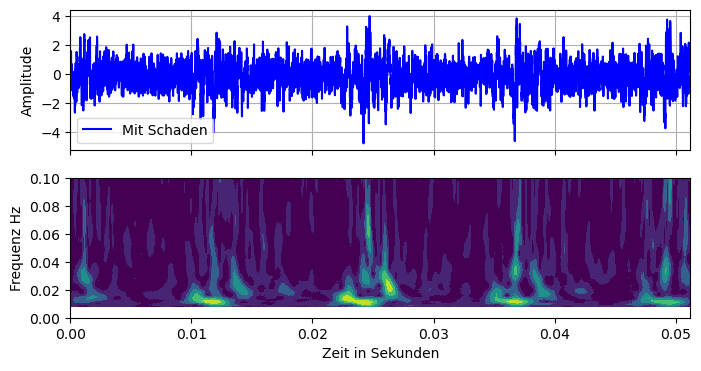

In [4]:
interval = 5000 # CHANGE this value

"""==============================================="""

N = math.floor(len(outerracefault3) / interval)

# Define the wavelet and scales
wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet
sampling_period = 0.000020
scales = np.arange(1,128)# TODO: this needs to be adjusted

# Perform CWT
coefficients, frequencies = pywt.cwt(outerracefault3['Signal'].loc[:interval], scales, wavelet)

outerracefault3["s"] = outerracefault3.index / 97656

plt.close()

fig, axs = plt.subplots(2,1, sharex=True, figsize=(8, 4))

# Plot the data within the selected range

axs[0].plot(outerracefault3.s.loc[0:interval], outerracefault3.Signal.loc[0:interval],  label='Mit Schaden', color='blue')
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid(True)

# Plot scalogram
cax = axs[1].contourf(outerracefault3['s'].loc[:interval], frequencies, abs(coefficients), extend='both', cmap='viridis')
axs[1].set_ylabel("Frequenz Hz")
axs[1].set_ylim(0.0,0.1)
#fig.colorbar(cax, label="Magnitude")


plt.xlabel('Zeit in Sekunden')
#plt.title('Vibrationssignal mit Außenringschaden')

fig.show()

Wie erzeugen daraus Bilder, die alle auf eine Größe von 227 x 227 Pixeln gebracht werden.

Warum werden die Bilder auf eine einheitliche Größe gebracht?
Probieren Sie andere Bildergrößen aus. Können Sie sich alternativen vorstellen?

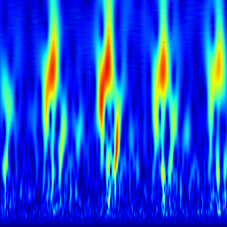

In [5]:
image_width = 227 # CHANGE this value
image_height = 227 # CHANGE this value

"""==============================================="""

interval = 5000
N = math.floor(len(outerracefault3) / interval)

# Define the wavelet and scales
wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet
sampling_period = 0.000020
scales = np.arange(1,128)# TODO: this needs to be adjusted

# Perform CWT
coefficients, frequencies = pywt.cwt(outerracefault3['Signal'].loc[:interval], scales, wavelet)
cfs = abs(coefficients)
flipped_cfs = np.flip(cfs, axis=0)
rescaled_cfs = np.round(255 * (flipped_cfs - flipped_cfs.min()) / (flipped_cfs.max() - flipped_cfs.min())).astype(int)

colormap = colormaps['jet'].resampled(320)
img = colormap(rescaled_cfs / 255.0)[:, :, :3] # rm alpha component
img = (img * 255).astype(np.uint8)
image = Image.fromarray(img)

# Warum wird gerade 227x227 verwendet?
resized_image = image.resize((image_width,image_height), Image.Resampling.LANCZOS)
resized_image

Das erzeugen aller Bilder braucht eine gewisse Zeit, deshalb haben wir das hier schon vorbereitet.

Schauen Sie sich die Struktur und die Bilder in den Ordnern
1. test_data
2. train_data

an.

Wir benötigen Klassen. Warum? Und welche sind das?
Um Innen- und Außenringfehler zu identifzieren, brauchen wir welche Klassen von Bildern?

In [6]:
def createData(data, path, filename):
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    # Which interval to choose?
    interval = 5000
    N = math.floor(len(data) / interval)

    # Define the wavelet and scales
    wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet
    sampling_period = 0.000020
    scales = np.arange(1,128)# TODO: this needs to be adjusted

    for i in range(N):
        # Perform CWT
        coefficients, frequencies = pywt.cwt(data['Signal'].loc[i*interval:(i+1)*interval], scales, wavelet)

        cfs = abs(coefficients)

        flipped_cfs = np.flip(cfs, axis=0)

        rescaled_cfs = np.round(255 * (flipped_cfs - flipped_cfs.min()) / (flipped_cfs.max() - flipped_cfs.min())).astype(int)

        colormap = colormaps['jet'].resampled(320)
        img = colormap(rescaled_cfs / 255.0)[:, :, :3] # rm alpha component
        img = (img * 255).astype(np.uint8)
        image = Image.fromarray(img)
        # Warum wird gerade 227x227 verwendet?
        resized_image = image.resize((227,227), Image.Resampling.LANCZOS)
        resized_image.save(f"{path}/{filename}-{i}.jpg", "JPEG")

""" REMOVE THIS LINE and use this to generate the test and training images, this will take ~8 minutes

# create train_data
createData(baseline1, "train_data/baseline", "baseline1")
createData(baseline2, "train_data/baseline", "baseline2")

createData(outerracefault1, "train_data/outerracefault", "outerracefault1")
createData(outerracefault2, "train_data/outerracefault", "outerracefault2")
createData(outerracefault_vload1, "train_data/outerracefault", "outerracefault_vload1")
createData(outerracefault_vload2, "train_data/outerracefault", "outerracefault_vload2")
createData(outerracefault_vload3, "train_data/outerracefault", "outerracefault_vload3")
createData(outerracefault_vload4, "train_data/outerracefault", "outerracefault_vload4")
createData(outerracefault_vload5, "train_data/outerracefault", "outerracefault_vload5")

createData(innerracefault_vload1, "train_data/innerracefault", "innerracefault_vload1")
createData(innerracefault_vload2, "train_data/innerracefault", "innerracefault_vload2")
createData(innerracefault_vload3, "train_data/innerracefault", "innerracefault_vload3")
createData(innerracefault_vload4, "train_data/innerracefault", "innerracefault_vload4")
createData(innerracefault_vload5, "train_data/innerracefault", "innerracefault_vload5")

# create test_data
createData(baseline3, "test_data/baseline", "baseline3")
createData(outerracefault3, "test_data/outerracefault", "outerracefault3")

createData(outerracefault_vload6, "test_data/outerracefault", "outerracefault_vload6")
createData(outerracefault_vload7, "test_data/outerracefault", "outerracefault_vload7")

createData(innerracefault_vload6, "test_data/innerracefault", "innerracefault_vload6")
createData(innerracefault_vload7, "test_data/innerracefault", "innerracefault_vload7")

REMOVE THIS LINE and use this to generate the test and training images, this will take ~8 minutes """ 
t = 5 # this line is only, that jupyter notebook is not printing the multline string above

Wir nehmen ein vortrainiertes Modell mit dem Namen _SqueezeNet_ (https://en.wikipedia.org/wiki/SqueezeNet).

Welchen Vorteil hat es, ein bereits (vor-)trainiertes Modell zu benutzen?
Tragen Sie die Zahl für die Anzahl der Fehlerklassen ein.

In [7]:
num_classes = 3  # ADD this value (number)
# Tragen Sie die Anzahl Fehlerklassen in den Code ein

"""==============================================="""

import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
import torch.optim as optim

# Load the pre-trained SqueezeNet model
squeezenet = models.squeezenet1_1(weights=models.SqueezeNet1_1_Weights.DEFAULT)

squeezenet.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
squeezenet.num_classes = num_classes



Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /home/jovyan/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth
100%|██████████| 4.73M/4.73M [00:02<00:00, 2.37MB/s]


Wir unterteilen unsere Bilder in Trainings- und Testdaten.

Wofür brauchen wir diese Unterteilung?

Fügen Sie den jeweils richtigen Ordernamen hinzu.

In [8]:
folderForTraining = 'images/train' # CHANGE this value
folderForTesting = 'images/test' # CHANGE this value

batchSize = 32
shuffleTrainingData = True
shuffleTestData = True

"""==============================================="""

# Define transformations for the training and validation datasets
transform = transforms.Compose([
   # transforms.Resize((224, 224)),  # Resizes the image to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizes the image based on ImageNet statistics
])

# Load your dataset
train_dataset = datasets.ImageFolder(root=folderForTraining, transform=transform)
val_dataset = datasets.ImageFolder(root=folderForTesting, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchSize, shuffle=shuffleTrainingData)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batchSize, shuffle=shuffleTestData)

Jetzt können wir das Training starten.

Zunächst müssen Sie festlegen, wie viele Durchläufe (= Epochen) Sie haben wollen.
Legen Sie dann die Lernrate fest.

ACHTUNG: Je mehr Epochen Sie wählen und je kleiner die Lernrate ist, umso länger braucht das Training. Starten Sie diesen Code, wenn Sie alles eingestellt haben.
(8 Epochen, 0.001 = ~6 Minuten)

In [9]:
num_epochs = 4 # CHANGE this value
learnRate = 0.001 # CHANGE this value

"""==============================================="""

# Specify the loss function and optimizer
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(squeezenet.parameters(), lr=learnRate)


# Assuming losses and accuracies are collected during training
train_losses = []  # fill these with your training loss values
val_accuracies = []  # fill these with your validation accuracy values
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
squeezenet.to(device)

for epoch in range(num_epochs):
    squeezenet.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = squeezenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
    train_losses.append(running_loss/len(train_loader))

    # Validation
    squeezenet.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = squeezenet(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Validation Accuracy: {100 * correct / total:.2f}%')
    val_accuracies.append(100 * correct / total)

Epoch [1/4], Loss: 0.8640
Validation Accuracy: 51.00%
Epoch [2/4], Loss: 0.3953
Validation Accuracy: 92.02%
Epoch [3/4], Loss: 0.6366
Validation Accuracy: 95.73%
Epoch [4/4], Loss: 0.1282
Validation Accuracy: 94.02%


### Ergebnisse visualisieren

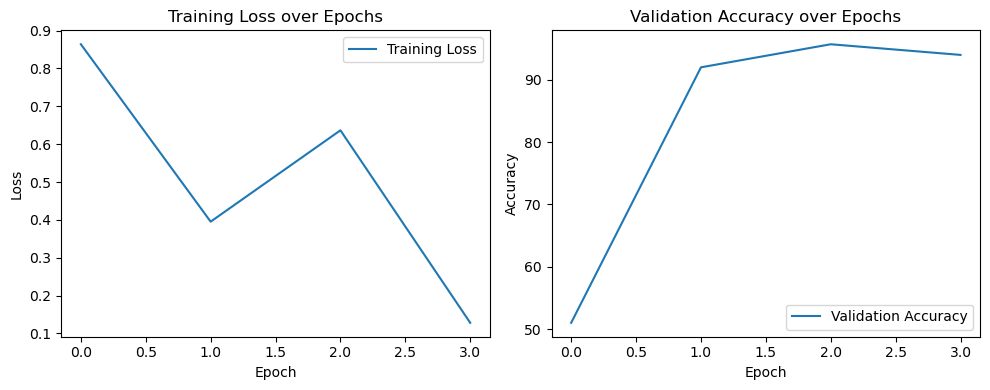

In [10]:
import matplotlib.pyplot as plt

# Plot loss over epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the 

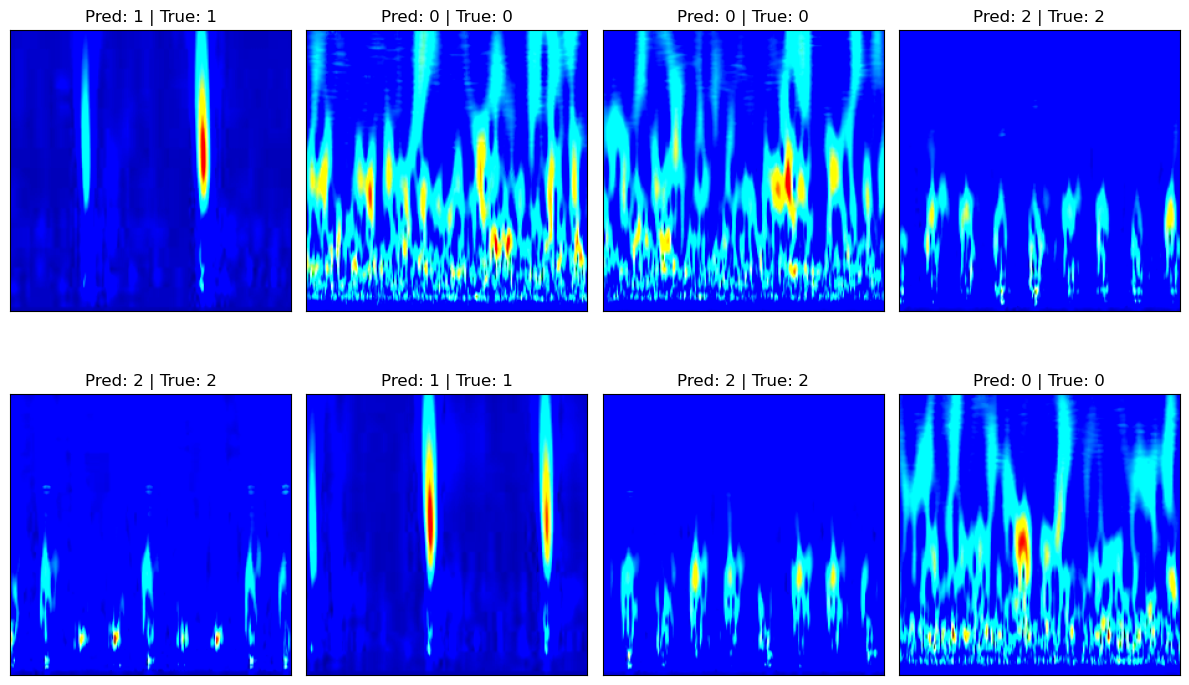

In [11]:
# Select a batch of images from your validation set
import numpy as np
dataiter = iter(val_loader)
images, labels = next(dataiter)

# Pass through model
outputs = squeezenet(images.to(device))
_, preds = torch.max(outputs, 1)

# Move data to CPU for numpy processing
images, preds, labels = images.cpu(), preds.cpu(), labels.cpu()

# Display images with predictions
fig = plt.figure(figsize=(12, 8))
for idx in np.arange(8):  # visualize first 8 predictions
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    img = images[idx] / 2 + 0.5  # unnormalize if needed
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # convert from Tensor image
    ax.set_title(f"Pred: {preds[idx]} | True: {labels[idx]}")
plt.tight_layout()
plt.show()

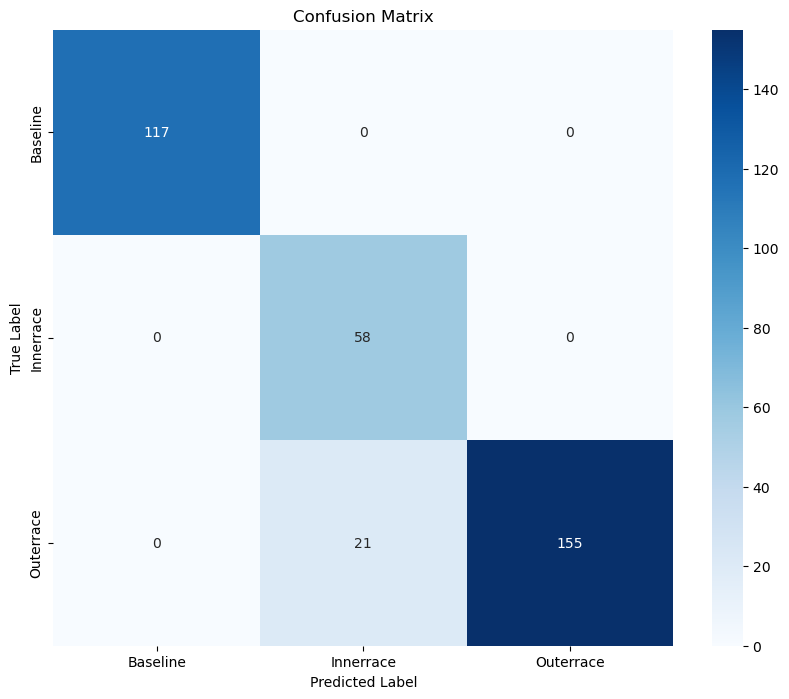

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Gather all predictions and true labels
all_preds = torch.tensor([])
all_labels = torch.tensor([])

# Make predictions on entire validation set
squeezenet.eval()
with torch.no_grad():
    for images, labels in val_loader:
        outputs = squeezenet(images.to(device))
        _, preds = torch.max(outputs, 1)
        all_preds = torch.cat((all_preds, preds.cpu()), dim=0)
        all_labels = torch.cat((all_labels, labels), dim=0)

# Compute confusion matrix
cm = confusion_matrix(all_labels.numpy(), all_preds.numpy())

df_cm = pd.DataFrame(cm, index=["Baseline","Innerrace","Outerrace"], columns=["Baseline","Innerrace","Outerrace"])

#category_mapping = { 'Baseline': 0, 'Innerrace': 1, 'Outerrace': 2 }

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Zusammenfassung